# ML INTERN AT PRODIGY INFOTECH

**TASK 1** : Implement a linear regression model to predict the prices of houses based on their square footage and the numbe of bedrooms and bathrooms.

Dataset : https://www.kaggle.com/datasets/shivachandel/kc-house-data

In [1]:
! pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [8]:
! kaggle datasets download shivachandel/kc-house-data

Dataset URL: https://www.kaggle.com/datasets/shivachandel/kc-house-data
License(s): other
  0% 0.00/770k [00:00<?, ?B/s]
100% 770k/770k [00:00<00:00, 77.6MB/s]


In [9]:
! unzip kc-house-data.zip

Archive:  kc-house-data.zip
  inflating: kc_house_data.csv       


# Import Required Libraries :

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load and Explore Data :

In [13]:
# /content/kc_house_data.csv
df = pd.read_csv('/content/kc_house_data.csv')

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Feature Selection

In [16]:
features = ['bedrooms', 'bathrooms', 'sqft_living']
target = 'price'

x = df[features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# Model Traning and Evaluation

In [17]:
# Initializing the model
model = LinearRegression()

# Training Model
model.fit(x_train, y_train)
prediction = model.predict(x_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, prediction)
print(mse)


74237634953.18283


# Testing of Model

In [18]:
new_data = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living': [1000]
})

predicted_price = model.predict(new_data)
print(predicted_price)

[229003.60268858]


# Data Visualization

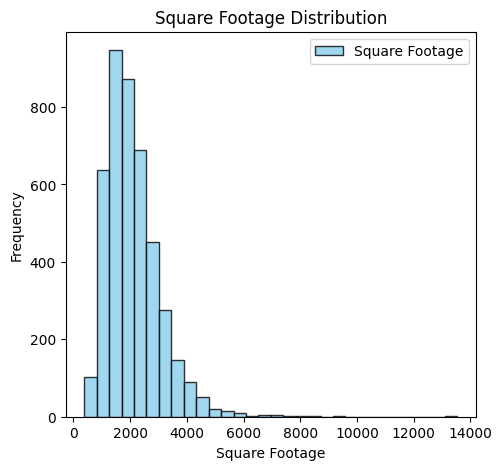

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
plt.hist(x_test['sqft_living'], bins = 30, color = 'skyblue', edgecolor = 'black', alpha = 0.8, label = 'Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.title('Square Footage Distribution')
plt.legend()


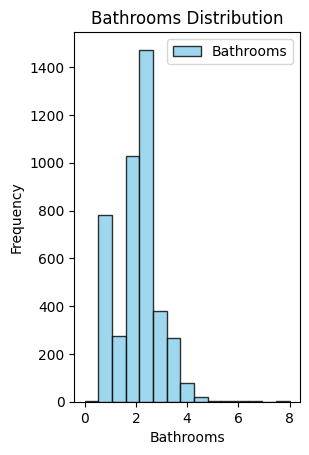

In [32]:
plt.subplot(1, 2, 1)
plt.hist(x_test['bathrooms'], bins = 15, color = 'skyblue', edgecolor = 'black', alpha = 0.8, label = 'Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.title('Bathrooms Distribution')
plt.legend()

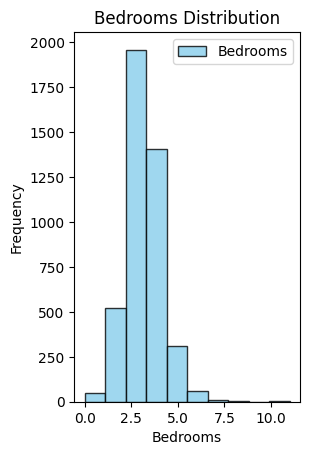

In [31]:
plt.subplot(1, 2, 1)
plt.hist(x_test['bedrooms'], bins = 10, color = 'skyblue', edgecolor = 'black', alpha = 0.8, label = 'Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Bedrooms Distribution')
plt.legend()

# 3D Plot of Features

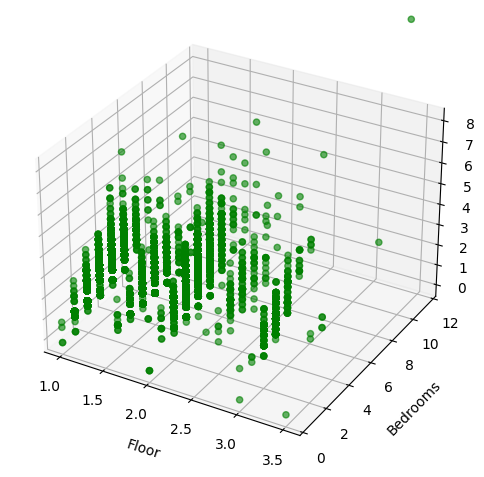

In [40]:
fig = plt.figure(figsize = (20, 13))
ax = fig.add_subplot(2, 2, 1, projection = '3d')
ax.scatter(df['floors'], df['bedrooms'], df['bathrooms'], c='green', alpha = 0.6)
ax.set_xlabel('\nFloor')
ax.set_ylabel('\nBedrooms')
ax.set_zlabel('\nBathrooms')
ax.set(ylim = [0, 12])
plt.show()

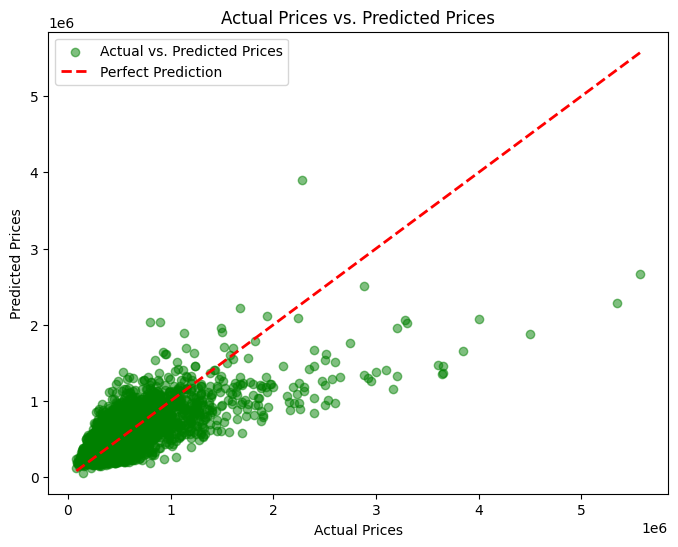

In [43]:
# Scatter plot for predictions vs. actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, color='green', alpha=0.5, label='Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()

# Metrics Calculation:

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, prediction)
print("r2_score : ", r2)

mae = mean_absolute_error(y_test, prediction)
print("mean_absolute_error : ", mae)

rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("Root Mean Squared Error : ", rmse)

r2_score :  0.50893471722649
mean_absolute_error :  174662.93438524887
Root Mean Squared Error :  272465.84180990985


# Conclusion:

*   Developed a linear regression model to predict house price based on square footage, no. of bedrooms and bathrooms.
*   Achieved a moderate performance with R- squared score of 0.509 which indicates 50.9% of price variance.

